In [22]:
from src.DataLoader import gdfLoader,MarkerLoader,RSSIDataLoader
from func.utils.getMarkerDictList import getMarkerDictList
from src.DataLoader import Room,Receiver

In [23]:
MapDataPath="data/cartePalaiseau.csv"
ModuleMapPath="data/carteModulePalaiseau.csv"
#Map Data
map_gdf=gdfLoader(MapDataPath)
#marker data
marker_gdf=MarkerLoader(ModuleMapPath)

<Axes: >

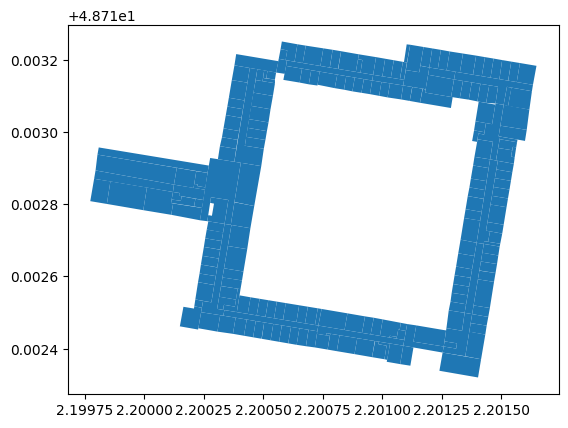

In [24]:
map_gdf['geometry'].plot()

In [25]:
ModuleMapPath="data/carteModulePalaiseau.csv"
marker_gdf=MarkerLoader(ModuleMapPath)


In [26]:
# Create a spatial index for the polygons
from shapely.geometry import Point, Polygon
from rtree import index
idx = index.Index()
for i, poly in enumerate(map_gdf['geometry']):
    idx.insert(i, poly.bounds)

In [27]:
# Define the points
points = marker_gdf
# Check which polygons each point is inside
res={}
for index,point in enumerate(marker_gdf['geometry']):
    for i in idx.intersection((point.x, point.y, point.x, point.y)):
        if map_gdf['geometry'][i].contains(point):
            print(f"The point {point} is inside polygon {i}")
            res[marker_gdf['macModule'][index]]=map_gdf['geometry'][i]


The point POINT (2.2007866061683496 48.713157751163116) is inside polygon 146
The point POINT (2.2011000149556117 48.71315483004127) is inside polygon 20
The point POINT (2.201195363079581 48.71314084307316) is inside polygon 112
The point POINT (2.2007200581389768 48.713166904690254) is inside polygon 130
The point POINT (2.2011746828046217 48.71317918188483) is inside polygon 20
The point POINT (2.200867161154747 48.71314928147962) is inside polygon 147
The point POINT (2.200978883869687 48.71316087476933) is inside polygon 97
The point POINT (2.2009414505789455 48.713140444154725) is inside polygon 121
The point POINT (2.2009284504732873 48.71316642923294) is inside polygon 96
The point POINT (2.2010571514186674 48.71315352665187) is inside polygon 123
The point POINT (2.2008387406309424 48.71317804320248) is inside polygon 95
The point POINT (2.2007622901244153 48.71318498422266) is inside polygon 82
The point POINT (2.200638986440939 48.71317445007082) is inside polygon 118
The po

In [28]:
def getMacModuleRoom(marker_gdf):
    res={}
    for index,row in marker_gdf.iterrows():
        res[row['macModule']]=row['geometry']
    return res 
marker_location_dict=getMacModuleLocation(marker_gdf)